<a href="https://colab.research.google.com/github/piero0090/Tesis-SeminarioII/blob/main/Clustering_football_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importación de librerías** ⏺

In [1]:
# Tratamiento de datos
# =========================================================================
import numpy as np
import pandas as pd
# Gráficos
# =========================================================================
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesado y modelado
# =========================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.pipeline import Pipeline
from sklearn import metrics
# Configuración warnings
# =========================================================================
import warnings
warnings.filterwarnings('ignore')
# =========================================================================
plt.style.use('ggplot')
#pd.set_option('max_columns',200)
pd.options.display.max_columns = 200
from itertools import cycle, islice

# **Lectura de datos** ✅

In [2]:
datosfm23 = pd.read_csv('/content/FootballManager23.csv')
print('El dataset cuenta con' ,len(datosfm23), 'registros')

El dataset cuenta con 8452 registros


In [3]:
datosfm23.head(3)

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,Current reputation,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,347975206,9450,9400,9400,Northern_European,181,4,6/28/1991,91,24,394372.0,NaN,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,17,18,12,7,13,4,4,15,18,4,17,6,17,12,18,14,15,15,15,18,13,18,3,10,10,20,16,15,8,15,20,14,11,15,7,16,7,14,2,2,2,1,1,2,1,3,2,1,2,15,20,8,14,16,16,12,13,1,1,1,1,1,1,1,10,1,10,19,1,17,20,178,73,10,20,347975206,9398,9398,9248,African_Caribbean,172,13,12/20/1998,57,27,1035616.0,NaN,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,19,18,15,17,12,3,7,13,20,7,16,15,19,16,17,17,13,17,20,14,15,19,7,12,12,14,13,19,15,20,14,18,16,18,8,15,2,8,2,2,3,2,3,2,3,3,2,1,1,15,20,15,10,16,18,10,11,1,1,1,1,1,1,1,1,1,1,10,12,8,20,185,81,13,20,347975206,9300,9400,9250,Northern_European,183,3,8/21/1988,132,76,345204.0,NaN,719601


# **Transformación del dataset** 🔼

In [4]:
#Eliminación de columnas innecesarias
datosfm23.drop(datosfm23.columns[np.r_[3:5, 43:48, 59:81, 83:92, 93:95, 96:98]],
               axis =1, inplace = True)

In [5]:
datosfm23.head(3)

,Name,Position,Age,Nationality,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Height,Weight,Date of birth,Salary
0,Kevin De Bruyne,M/AM RLC,31,Belgium,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,1,3,1,3,3,3,3,3,3,2,1,181,68,6/28/1991,394372.0
1,Kylian Mbappé,AM/S RL,23,France,Paris Saint-Germain,13,13,18,17,18,12,7,13,4,4,15,18,4,17,6,17,12,18,14,15,15,15,18,13,18,3,10,10,20,16,15,8,15,20,14,11,2,2,2,1,1,2,1,3,2,1,2,178,73,12/20/1998,1035616.0
2,Robert Lewandowski,S,33,Poland,Barcelona,3,8,13,19,18,15,17,12,3,7,13,20,7,16,15,19,16,17,17,13,17,20,14,15,19,7,12,12,14,13,19,15,20,14,18,16,2,2,3,2,3,2,3,3,2,1,1,185,81,8/21/1988,345204.0


In [6]:
#Columnas con valores nulos del dataset
valnulos = datosfm23.isnull().sum()
pos = -1
for i in valnulos:
  pos +=1
  if i > 1:
    print('La columna' ,valnulos.index[pos], 'presenta', i, 'valores nulos')

La columna Club presenta 107 valores nulos
La columna Salary presenta 107 valores nulos


In [7]:
#Se elimina las filas que presentan valores nulos
datosfm23 = datosfm23[datosfm23['Club'].notna()]
print('El dataset final presenta', len(datosfm23), 'datos y', len(datosfm23.columns), 'variables')

El dataset final presenta 8345 datos y 56 variables


In [8]:
#Dataset sin porteros
df_players_field = datosfm23.copy()
indexPosition = df_players_field[df_players_field['Position'] == 'GK'].index
df_players_field.drop(indexPosition , inplace=True)
#df_players_field.head(3)

In [9]:
#Datos finales para modelo de ML
datosML = df_players_field.drop(df_players_field.columns[np.r_[0:5, 52:56]], axis =1)

In [10]:
datosML = datosML.set_axis(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15',
                            'X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
                            'X31','X32','X33','X34','X35','X36','X37','X38','X39','X40','X41','X42','X43','X44','X45',
                            'X46','X47'], axis=1)

In [11]:
datosML.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47
0,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,1,3,1,3,3,3,3,3,3,2,1
1,13,13,18,17,18,12,7,13,4,4,15,18,4,17,6,17,12,18,14,15,15,15,18,13,18,3,10,10,20,16,15,8,15,20,14,11,2,2,2,1,1,2,1,3,2,1,2
2,3,8,13,19,18,15,17,12,3,7,13,20,7,16,15,19,16,17,17,13,17,20,14,15,19,7,12,12,14,13,19,15,20,14,18,16,2,2,3,2,3,2,3,3,2,1,1


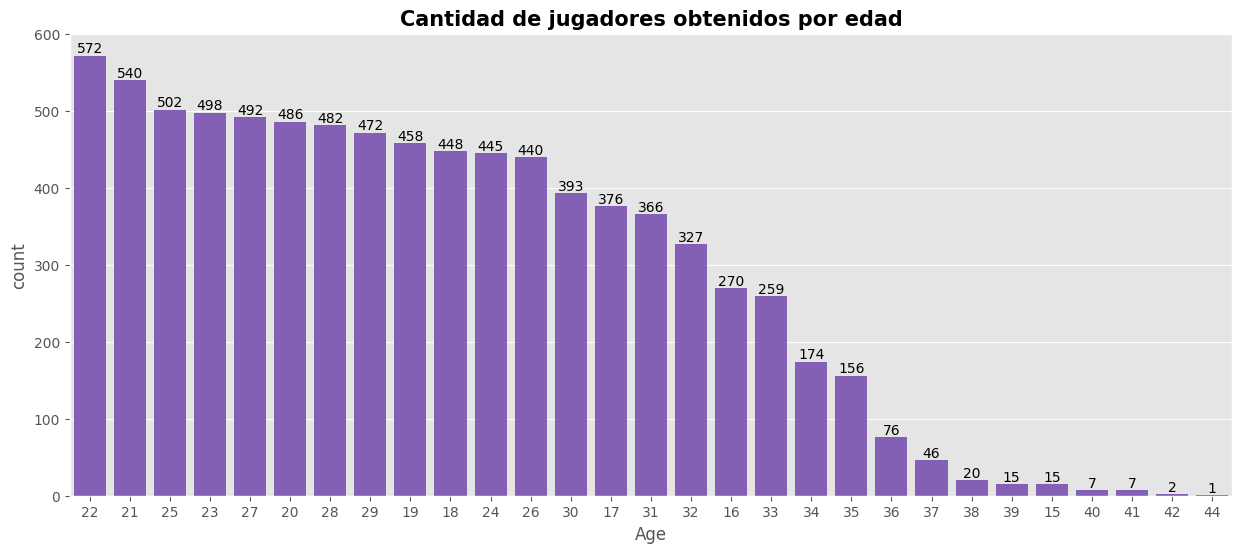

In [12]:
from matplotlib import pyplot
a4_dims = (15, 6)
#df = mylib.load_data()
figdata, axdata = pyplot.subplots(figsize=a4_dims)
sns.countplot(x=datosfm23['Age'],
                   order=datosfm23['Age'].value_counts(ascending=False).index, color = '#8250C4')
abs_values = datosfm23['Age'].value_counts(ascending=False).values
var = axdata.bar_label(container=axdata.containers[0], labels=abs_values)
count_title = axdata.set_title('Cantidad de jugadores obtenidos por edad', fontsize=15, weight='bold')

# **Pre-procesamiento de datos** 💯

In [13]:
datosML.shape

(7658, 47)

In [14]:
#Obtener una muestra de los datos, pues los registros son de aproximadamente 8000
dataSample = datosML.sample(n = 2000, random_state = 1)

In [15]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataSample)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [16]:
list_names = [f'PC{i}' for i in range (1,48)]

In [17]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
modelo_dataframe = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataSample.columns,
    index   = list_names
)
#Muestra del dataframe creado en base a todos los componentes principales. Nota: en el siguiente
#cuadro solo se muestra los 3 primeros componentes, pues existen 47.
modelo_dataframe.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47
PC1,-0.204184,-0.176317,-0.246654,-0.198756,-0.180588,-0.180133,0.215010,-0.171866,0.118772,0.264976,-0.071508,-0.123755,0.252159,-0.203608,0.132235,0.091100,0.182851,0.031453,0.121148,-0.137690,0.062718,0.061820,-0.256995,0.139633,-0.187202,0.241048,0.122311,0.103502,-0.149215,-0.185153,0.081643,0.217290,0.057661,-0.091579,0.090341,0.198196,0.006331,0.008369,-0.001628,0.009942,0.006236,0.010646,0.001721,-0.012802,0.004860,-0.011322,0.005866
PC2,-0.140171,-0.174152,-0.133938,-0.108712,-0.179822,-0.173023,-0.065135,-0.184240,-0.095815,-0.090055,-0.236183,-0.194591,-0.092906,-0.193923,-0.116502,-0.235706,-0.189599,-0.254714,-0.247938,-0.224017,-0.162022,-0.122970,-0.089520,-0.161578,-0.172434,-0.114529,-0.257019,-0.216772,-0.001514,-0.091199,-0.219056,-0.065425,-0.103347,-0.025056,-0.219791,-0.168920,-0.015818,0.009856,-0.016936,0.009810,-0.002486,-0.000918,-0.006150,-0.001306,-0.002852,-0.009687,0.002924
PC3,0.170394,0.039087,-0.097688,-0.157969,0.137529,0.144384,-0.138741,0.059895,-0.025907,0.113453,0.250005,-0.058995,0.121348,0.104480,-0.117182,-0.012950,-0.170245,0.067787,0.016995,0.216388,0.237607,-0.111391,-0.058406,0.116957,-0.157518,0.165313,0.003788,-0.152956,-0.384191,-0.180579,-0.137243,-0.118439,-0.177787,-0.439626,-0.200319,-0.176733,0.018394,0.005682,-0.003162,0.005214,0.008872,0.013410,-0.008396,-0.015620,0.027504,-0.003934,0.003364


In [18]:
x_range = range(20)
explainedvce = modelo_pca.explained_variance_ratio_
cum_explained_variance = modelo_pca.explained_variance_ratio_.cumsum()

In [19]:
varianceCum_array = []
for varianceCum in range(0,20):
    varianceCum_array.append(cum_explained_variance[varianceCum])

In [20]:
varianceRatio_array = []
for varianceRatio in range(0,20):
    varianceRatio_array.append(explainedvce[varianceRatio])

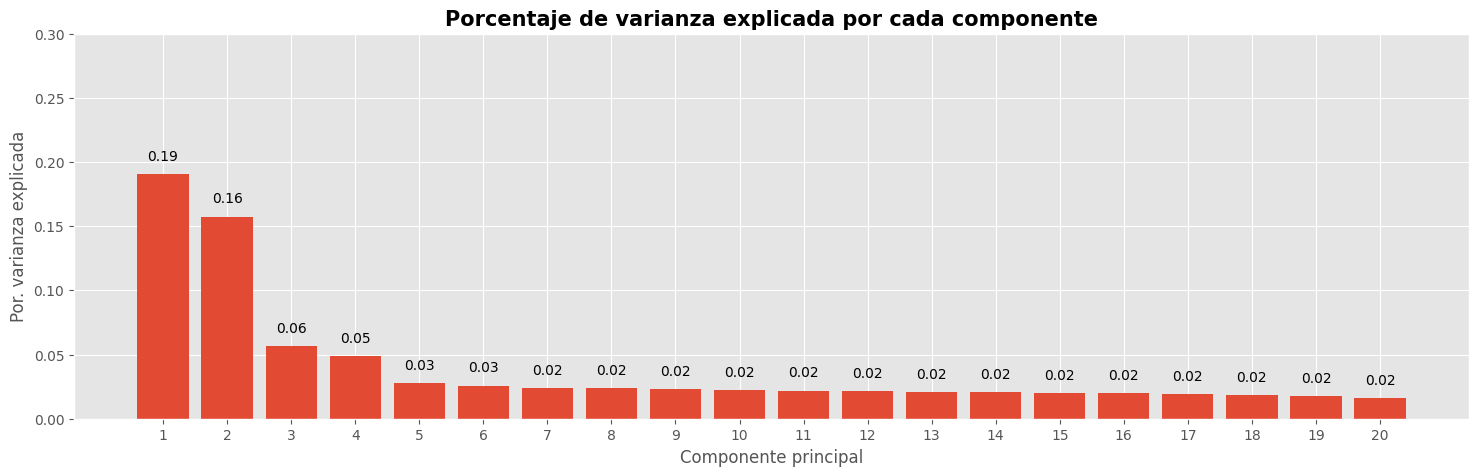

In [21]:
# Porcentaje de varianza explicada por cada componente

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
ax.bar(
    x      = np.arange(20)+1,
    height = varianceRatio_array
)

for x, y in zip(np.arange(20) +1, varianceRatio_array):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(20) +1)
ax.set_ylim(0, 0.3)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=15, weight='bold')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [22]:
#FINALIZAR CUADRO
#https://interactivechaos.com/es/manual/tutorial-de-machine-learning/visualizacion-de-la-varianza-explicada

In [23]:
cum_explained_variance

array([0.19056232, 0.34804959, 0.40472894, 0.45334871, 0.48122269,
       0.50706473, 0.53090712, 0.55457422, 0.57781235, 0.60023135,
       0.62211181, 0.64340626, 0.66437828, 0.68489904, 0.70502501,
       0.72473139, 0.74371551, 0.76201676, 0.77987876, 0.79583451,
       0.81132532, 0.82525774, 0.83786189, 0.85002801, 0.86149491,
       0.87194719, 0.88181576, 0.89081301, 0.89920538, 0.90747658,
       0.91555497, 0.92323013, 0.93083606, 0.9380462 , 0.94471863,
       0.95132039, 0.95740011, 0.96297226, 0.96828898, 0.9732682 ,
       0.97806702, 0.98237237, 0.98663113, 0.99038067, 0.99406971,
       0.99761926, 1.        ])

In [24]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.19056232, 0.34804959, 0.40472894, 0.45334871, 0.48122269,
       0.50706473, 0.53090712, 0.55457422, 0.57781235, 0.60023135,
       0.62211181, 0.64340626, 0.66437828, 0.68489904, 0.70502501,
       0.72473139, 0.74371551, 0.76201676, 0.77987876, 0.79583451,
       0.81132532, 0.82525774, 0.83786189, 0.85002801, 0.86149491,
       0.87194719, 0.88181576, 0.89081301, 0.89920538, 0.90747658,
       0.91555497, 0.92323013, 0.93083606, 0.9380462 , 0.94471863,
       0.95132039, 0.95740011, 0.96297226, 0.96828898, 0.9732682 ,
       0.97806702, 0.98237237, 0.98663113, 0.99038067, 0.99406971,
       0.99761926, 1.        ])

In [25]:
explainedvce

array([0.19056232, 0.15748726, 0.05667936, 0.04861977, 0.02787398,
       0.02584204, 0.02384239, 0.0236671 , 0.02323813, 0.02241899,
       0.02188046, 0.02129445, 0.02097202, 0.02052076, 0.02012597,
       0.01970638, 0.01898412, 0.01830125, 0.017862  , 0.01595575,
       0.01549082, 0.01393242, 0.01260414, 0.01216612, 0.01146691,
       0.01045228, 0.00986856, 0.00899726, 0.00839236, 0.00827121,
       0.00807838, 0.00767516, 0.00760594, 0.00721013, 0.00667244,
       0.00660175, 0.00607972, 0.00557214, 0.00531672, 0.00497922,
       0.00479883, 0.00430534, 0.00425877, 0.00374954, 0.00368903,
       0.00354955, 0.00238074])

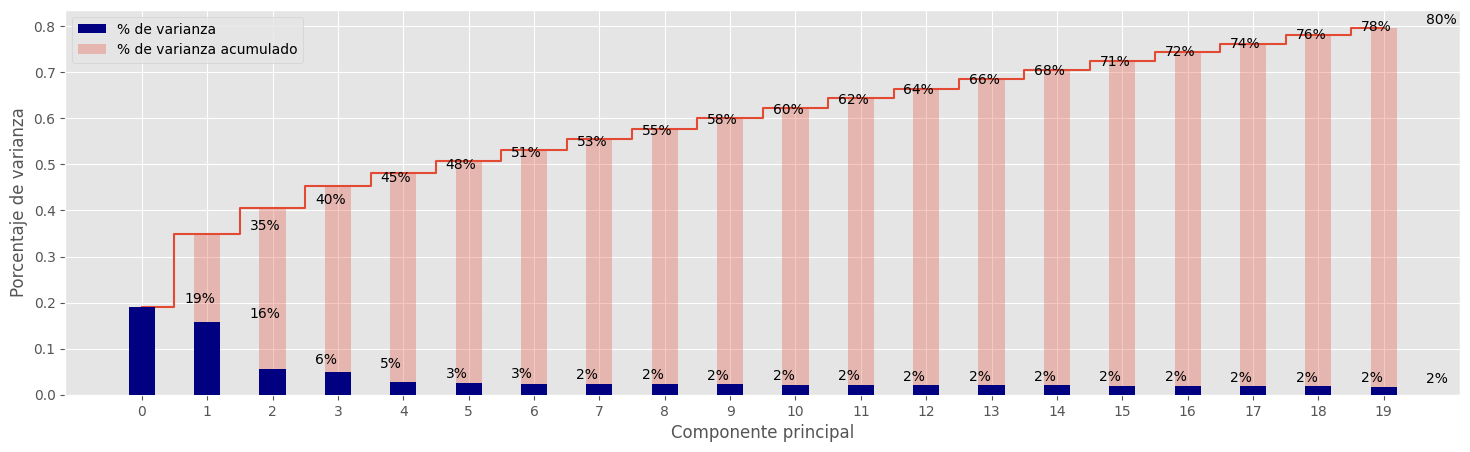

In [26]:
fig, ax = plt.subplots(figsize = (18, 5))
ax.bar(x = x_range, width = 0.4,height = varianceRatio_array, zorder = 20,
       color = "navy", label = "% de varianza")
ax.bar(x = x_range, width = 0.4,height = varianceCum_array, alpha = 0.3,
       label = "% de varianza acumulado")
ax.step(x = x_range, y = varianceCum_array, where = "mid")
ax.set_xlabel("Componente principal")
ax.set_ylabel("Porcentaje de varianza")
for i, v in enumerate(varianceRatio_array):
    ax.text(x = i + 0.65, y = v + 0.01, s = str(round(v * 100)) + "%")
for i, v in enumerate(varianceCum_array[1:], start = 1):
    ax.text(x = i + 0.65, y = v + 0.01, s = str(round(v * 100)) + "%")
ax.set_xticks(x_range, labels = x_range)
ax.legend()
plt.show()

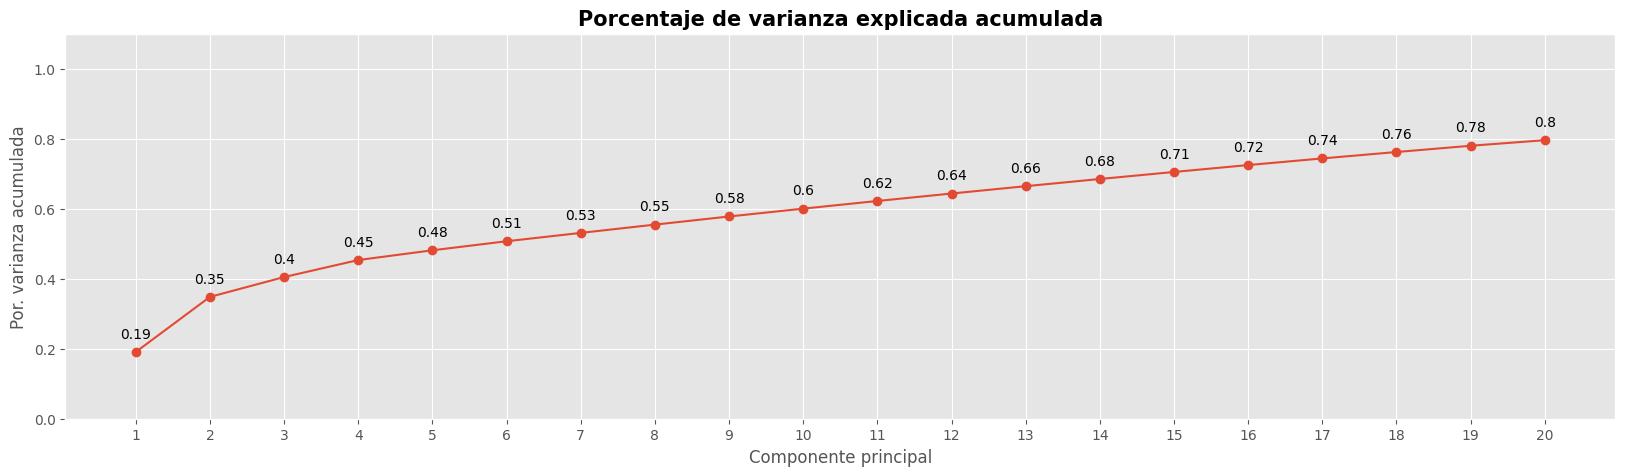

In [27]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = varianceCum_array
#prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
ax.plot(
    np.arange(20) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(20) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(20) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada', fontsize=15, weight='bold')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

[Text(0.5, 1.0, 'Mapa de calor de correlación de las variables')]

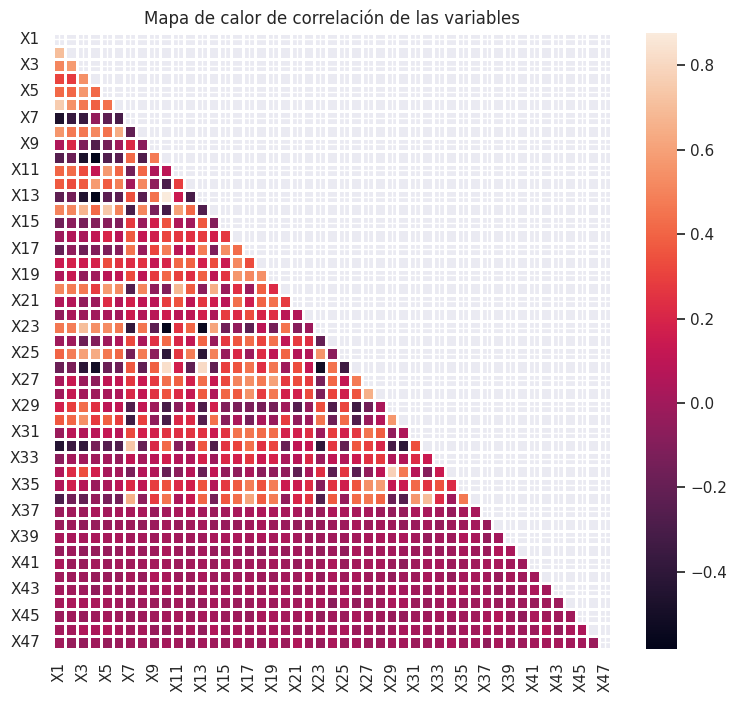

In [28]:
#Matriz de correlación de las variables (verificar que haya correlacion
#entre variables para aplicar PCA)
correlation= dataSample.corr()
matrix = np.triu(correlation)
sns.set(rc={'figure.figsize':(9,8)})
sns.heatmap(correlation, mask=matrix, linewidths=1,
            linecolor='white').set(title='Mapa de calor de correlación de las variables')

In [29]:
#Estandarización de datos
scaler = StandardScaler()
datascaler = scaler.fit_transform(dataSample)
df_scaler = pd.DataFrame(datascaler)

In [30]:
#PCA
pca_modelos = PCA(n_components=20)
pca_modelos.fit(df_scaler)
datos_transformados = pca_modelos.transform(df_scaler)

In [31]:
nombres = [f'PC{i}' for i in range (1,21)]
df = pd.DataFrame(datos_transformados,columns=nombres)
df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.502745,-3.231835,2.587939,2.409828,-1.368208,0.485640,0.054729,-2.268431,0.194849,0.290065,0.649611,1.330398,-0.994009,1.196929,0.343892,0.037906,-0.023875,-0.702784,0.807128,0.469203
1,-5.030445,-0.859042,2.179409,-0.377385,-0.102755,-0.272637,-0.392063,1.078133,1.436116,0.733940,-0.648843,-0.130630,-0.065045,-0.208830,0.949120,-1.033638,1.411426,1.217024,-0.361810,-0.186842
2,-1.844631,2.866507,-2.149831,-0.494634,-1.374662,-1.312034,-2.059160,0.225726,0.740599,-1.132422,0.093699,-0.872754,-1.346101,-0.326662,-0.823481,0.721353,-0.553563,-1.811576,0.088165,-0.323394


In [32]:
dataSample.shape

(2000, 47)

# **Modelos** ⏏

In [33]:
#Muestra
muestra_pruebas = dataSample.sample(n = 1000, random_state = 1)
#sample_data = muestra_pruebas.to_numpy()

#Estandarización de datos de prueba
#scaler = StandardScaler()
#datascaler = scaler.fit_transform(dataSample)
#df_scaler = pd.DataFrame(datascaler)

#PCA 2 componentes de prueba
pca02 = PCA(n_components=2)
pca02.fit(muestra_pruebas)
data_transform = pca02.transform(muestra_pruebas)

In [34]:
data_transform.shape

(1000, 2)

In [35]:
#Búsqueda de número de clústeres
silueta_kmeans = []
silueta_minibatch = []
silueta_affinity = []
silueta_spectral = []
silueta_ward = []
silueta_em = []
rango = range(2,11)

In [36]:
for k in rango:
  k_means = KMeans(n_clusters = k).fit(data_transform)
  label_kmeans = k_means.labels_
  silueta_kmeans.append(silhouette_score(data_transform, label_kmeans))

In [37]:
for m in rango:
  minibatch = MiniBatchKMeans(n_clusters= m).fit(data_transform)
  label_minibatch = minibatch.labels_
  silueta_minibatch.append(silhouette_score(data_transform, label_minibatch))

In [38]:
for s in range(2,11):
  spectral = SpectralClustering(n_clusters = s, eigen_solver = 'lobpcg').fit(data_transform)
  label_spectral = spectral.labels_
  silueta_spectral.append(silhouette_score(data_transform, label_spectral))

In [39]:
for w in rango:
  ward = AgglomerativeClustering(n_clusters = w).fit(data_transform)
  label_ward = ward.labels_
  silueta_ward.append(silhouette_score(data_transform, label_ward))

In [40]:
for g in rango:
  em = GaussianMixture(n_components = g).fit(data_transform)
  label_em = em.predict(data_transform)
  silueta_em.append(silhouette_score(data_transform, label_em))

In [41]:
silueta_spectral

[0.42118001626609713,
 0.42481774127973176,
 0.3721089796725473,
 0.3716453862295157,
 0.29145718410771976,
 0.17662059222494542,
 0.14554667213249042,
 0.14709988146041553,
 0.14094175108957102]

In [42]:
silueta_minibatch

[0.3951258504858961,
 0.3975047384978586,
 0.3688226293031916,
 0.36587412431699246,
 0.3189794166076988,
 0.3288223032384504,
 0.33558368805360256,
 0.3347320921035771,
 0.32645762954029217]

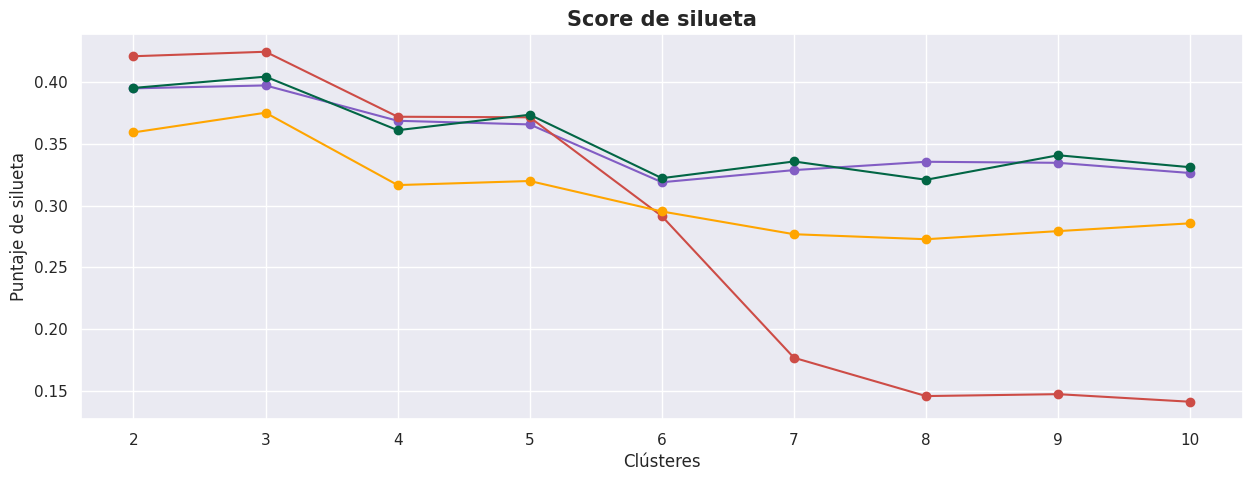

In [43]:
plt.figure(figsize=(15,5))
plt.plot(rango, silueta_minibatch, color='#825DC4', marker = 'o',linewidth = 1.5)
plt.plot(rango, silueta_spectral, color='#CD4C46', marker = 'o',linewidth = 1.5)
plt.plot(rango, silueta_ward, color='#FFA500', marker = 'o',linewidth = 1.5)
plt.plot(rango, silueta_em, color='#026645', marker = 'o',linewidth = 1.5)
plt.xlabel('Clústeres', fontsize = 12)
plt.ylabel('Puntaje de silueta', fontsize = 12)
plt.title('Score de silueta', fontsize = 15,weight='bold')
plt.show()

Para n_clusters = 2 La puntuación de silueta media es : 0.3956843805171858
Para n_clusters = 3 La puntuación de silueta media es : 0.39549134039729794
Para n_clusters = 4 La puntuación de silueta media es : 0.3682394922009014
Para n_clusters = 5 La puntuación de silueta media es : 0.36711070273318125
Para n_clusters = 6 La puntuación de silueta media es : 0.3567441391001824


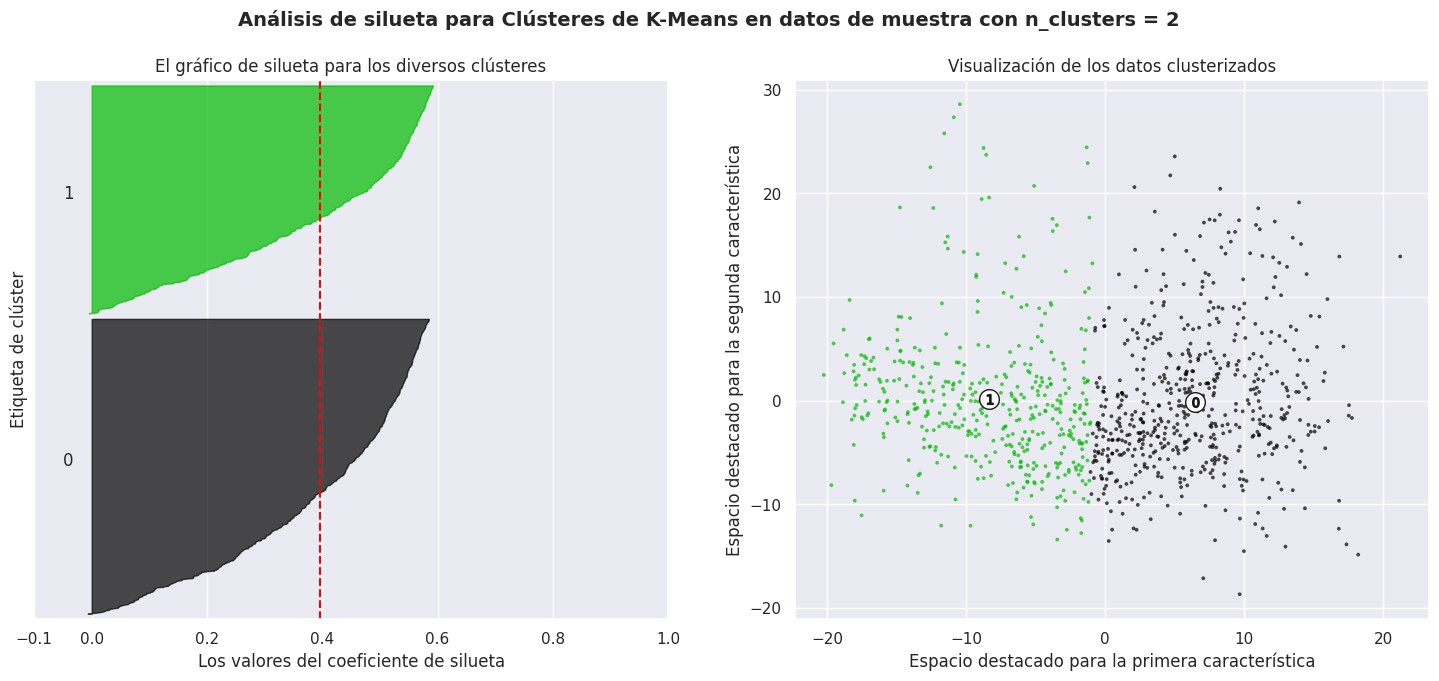

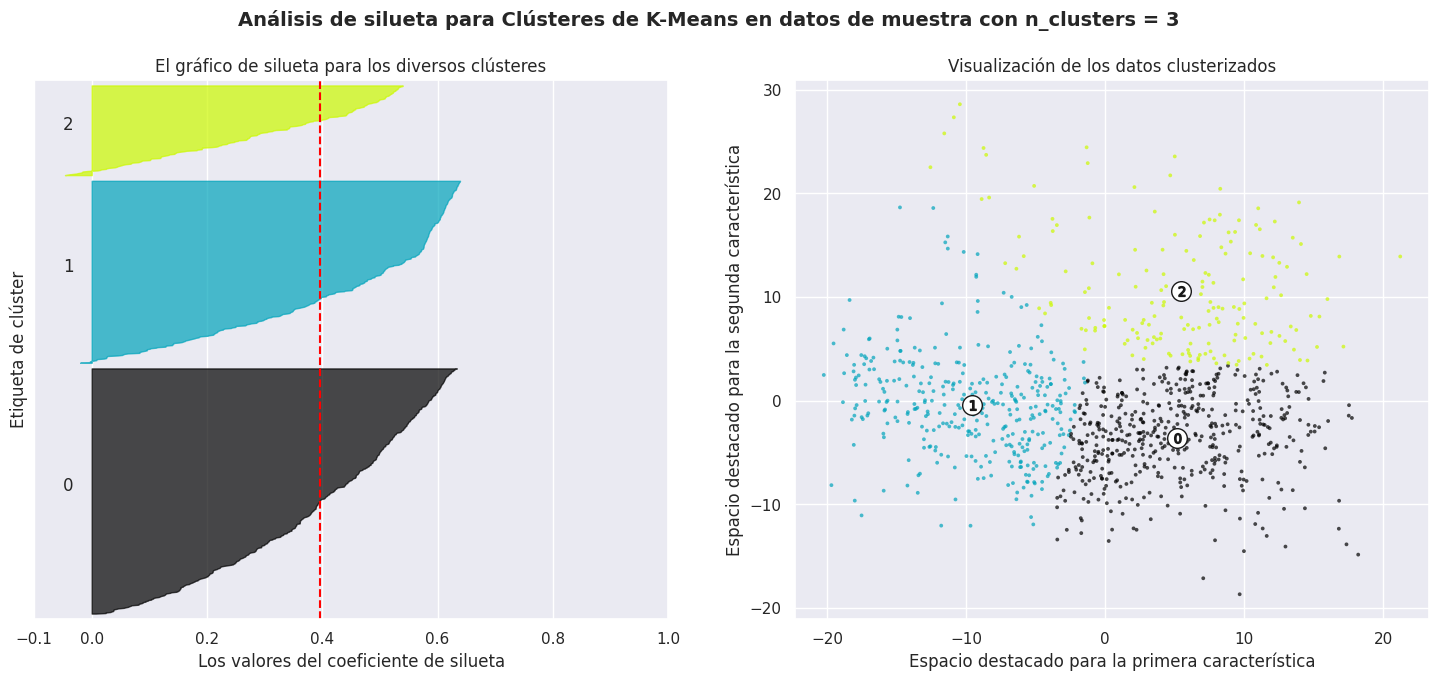

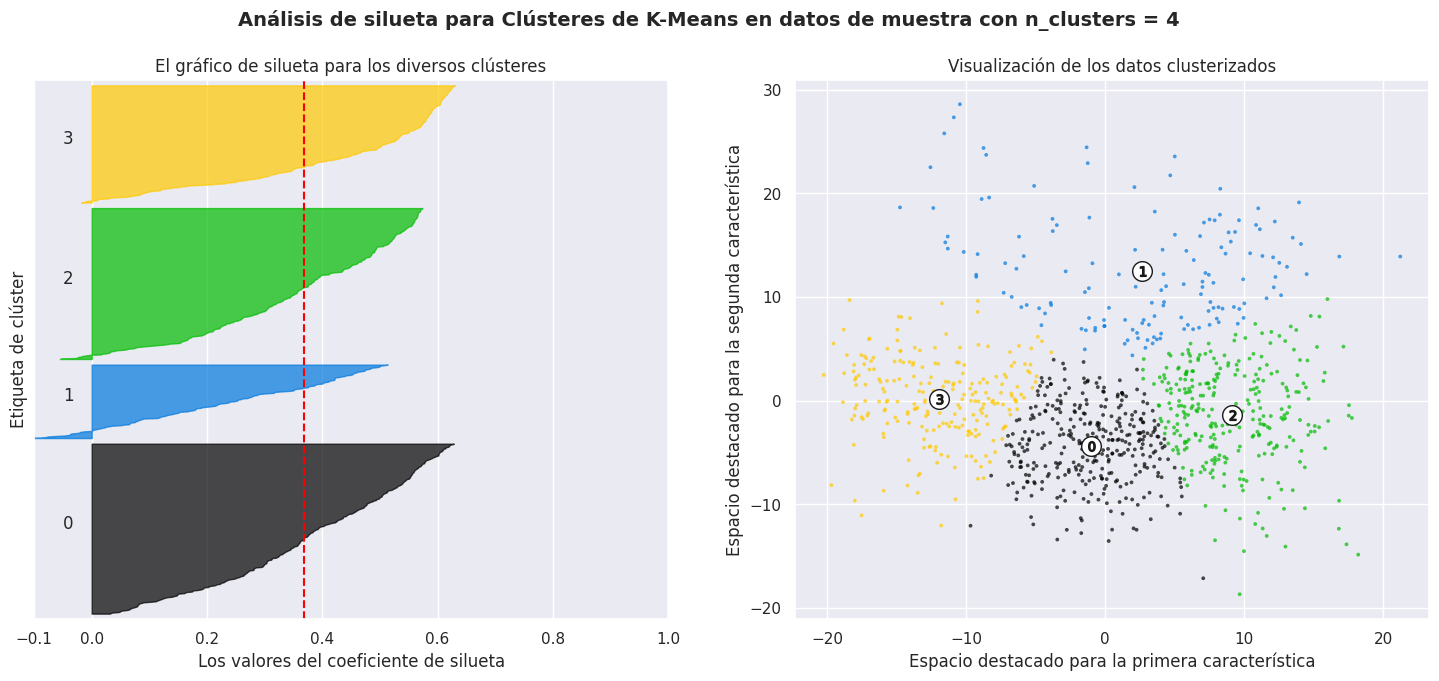

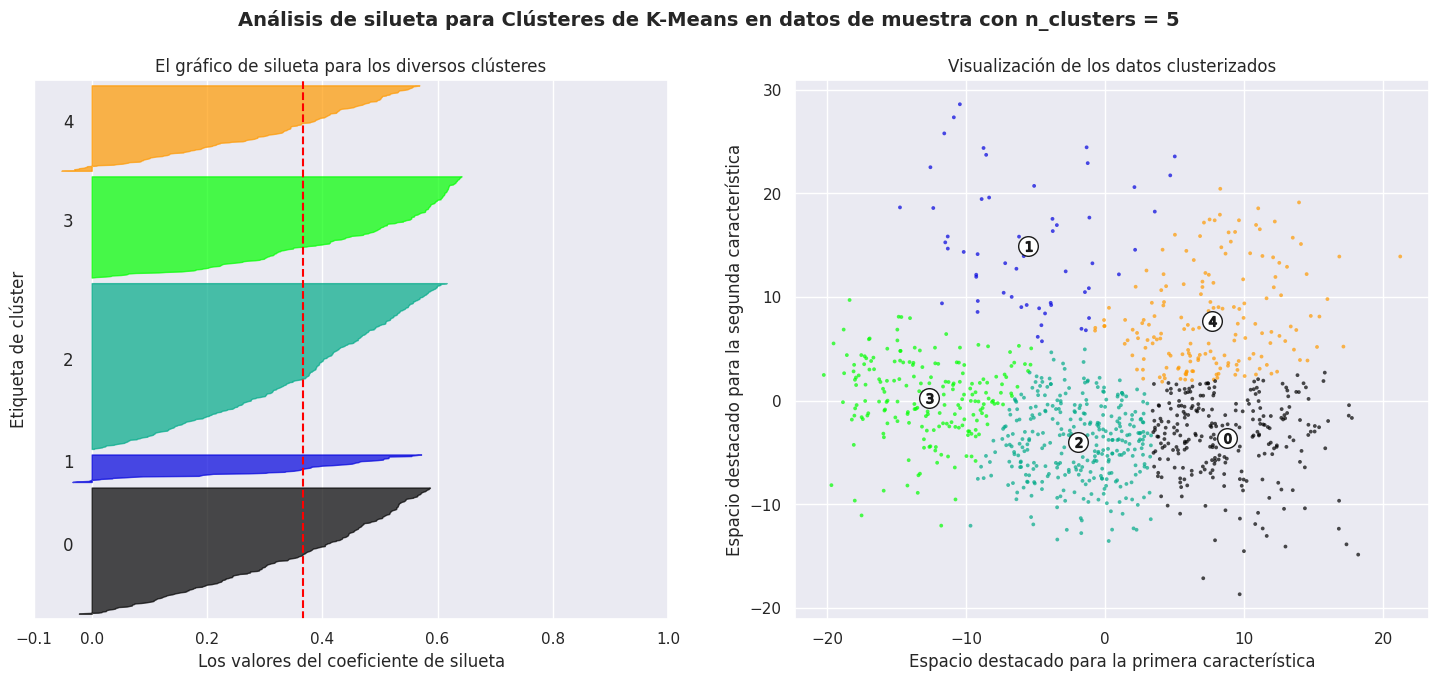

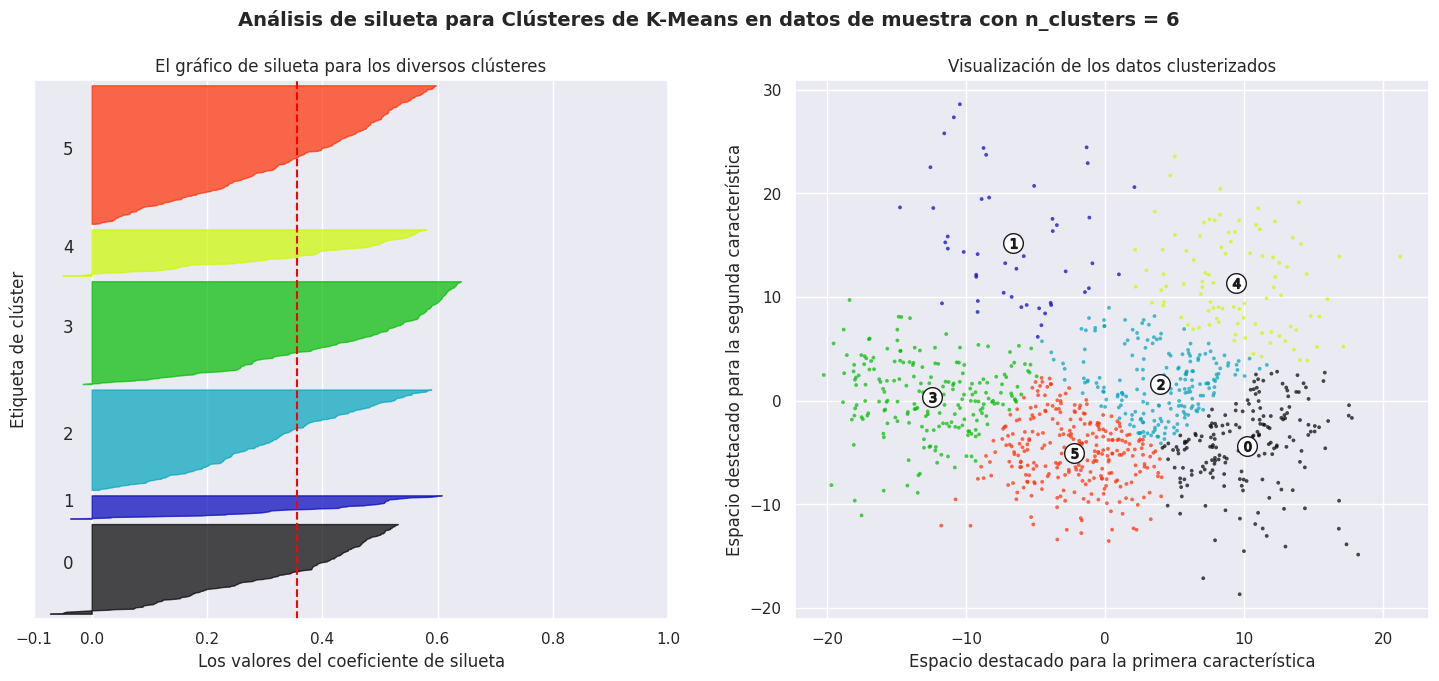

In [44]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]
f = data_transform.copy()

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(f) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(f)

    silhouette_avg = silhouette_score(f, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "La puntuación de silueta media es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(f, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("El gráfico de silueta para los diversos clústeres")
    ax1.set_xlabel("Los valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta de clúster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        f[:, 0], f[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualización de los datos clusterizados")
    ax2.set_xlabel("Espacio destacado para la primera característica")
    ax2.set_ylabel("Espacio destacado para la segunda característica")

    plt.suptitle(
        "Análisis de silueta para Clústeres de K-Means en datos de muestra con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## **1. MiniBatch K-Means**

In [45]:
MBdf = df.copy()
MBKM = MiniBatchKMeans(init ='k-means++', n_clusters = 3,
                      batch_size = 45, n_init = 10,
                      max_no_improvement = 10, verbose = 0, max_iter = 50).fit(MBdf)

In [46]:
silhouette_minibatch = silhouette_score(MBdf,MBKM.labels_, metric="euclidean").round(4)
print('El score de silueta de MiniBatch K-Means es', silhouette_minibatch)

El score de silueta de MiniBatch K-Means es 0.1113


In [47]:
calMiniBatch = metrics.calinski_harabasz_score(MBdf, MBKM.labels_).round(4)
print('El Índice de Calinski-Harabasz de MiniBatch K-Means es',calMiniBatch)

El Índice de Calinski-Harabasz de MiniBatch K-Means es 315.9893


In [48]:
davies_MiniBatch = davies_bouldin_score(MBdf, MBKM.labels_).round(4)
print('El Índice de Davies-Bouldin de MiniBatch K-Means es', davies_MiniBatch)

El Índice de Davies-Bouldin de MiniBatch K-Means es 2.2702


## **2. Affinity Propagation**

In [49]:
APdf = df.copy()
AffP = AffinityPropagation(damping=0.9 ,affinity='euclidean' ,verbose=0, preference= -1000).fit(APdf)

In [50]:
silhouette_affinity = silhouette_score(APdf, AffP.labels_, metric="sqeuclidean").round(4)
print('El score de silueta de Affinity Propagation es', silhouette_affinity)

El score de silueta de Affinity Propagation es 0.0927


In [51]:
calAffinity = metrics.calinski_harabasz_score(APdf, AffP.labels_).round(4)
print('El Índice de Calinski-Harabasz de Affinity Propagation es',calAffinity)

El Índice de Calinski-Harabasz de Affinity Propagation es 139.9567


In [52]:
davies_Affinity = davies_bouldin_score(APdf, AffP.labels_).round(4)
print('El Índice de Davies-Bouldin de Spectral Clustering es', davies_Affinity)

El Índice de Davies-Bouldin de Spectral Clustering es 2.8999


## **3. Spectral Clustering**

In [53]:
Scdf = df.copy()
#SC_array = Scdf.to_numpy()
SC = SpectralClustering(n_clusters=3, affinity='rbf', assign_labels='kmeans').fit(Scdf)

In [54]:
silhouette_SC = silhouette_score(Scdf,SC.labels_, metric="sqeuclidean").round(4)
print('El score de silueta de Spectral Clustering es',silhouette_SC)

El score de silueta de Spectral Clustering es 0.8068


In [55]:
calSpectral = metrics.calinski_harabasz_score(Scdf, SC.labels_).round(4)
print('El Índice de Calinski-Harabasz de Spectral Clustering es',calSpectral)

El Índice de Calinski-Harabasz de Spectral Clustering es 9.4027


In [56]:
davies_Spectral = davies_bouldin_score(Scdf, SC.labels_).round(4)
print('El Índice de Davies-Bouldin de Spectral Clustering es',davies_Spectral)

El Índice de Davies-Bouldin de Spectral Clustering es 0.317


## **4. Ward**

In [57]:
AggCdf = df.copy()
AggCL = AgglomerativeClustering(n_clusters = 3).fit(AggCdf)

In [58]:
silhouette_AggCL = silhouette_score(AggCdf, AggCL.labels_, metric="sqeuclidean").round(4)
print('El score de silueta de Ward es', silhouette_AggCL)

El score de silueta de Ward es 0.1522


In [59]:
calWard = metrics.calinski_harabasz_score(AggCdf, AggCL.labels_).round(4)
print('El Índice de Calinski-Harabasz de Ward es',calWard)

El Índice de Calinski-Harabasz de Ward es 258.7955


In [60]:
davies_Ward = davies_bouldin_score(AggCdf, AggCL.labels_).round(4)
print('El Índice de Davies-Bouldin de Ward es', davies_Ward)

El Índice de Davies-Bouldin de Ward es 2.3744


## **5. Gaussian Mixture Model (EM)**

In [61]:
EMdf = df.copy()
EM = GaussianMixture(n_components=3 ,init_params='k-means++', max_iter = 3000).fit(EMdf)
EMclustering = EM.predict(EMdf)

In [62]:
#Dataframe EM
#['EM_clustering'] = EMclustering
#EMdf.head(3)

In [63]:
silhouette_EM = silhouette_score(EMdf,EMclustering, metric="euclidean").round(4)
print('El score de silueta de Expectation Maximization es', silhouette_EM)

El score de silueta de Expectation Maximization es 0.0491


In [64]:
calEM = metrics.calinski_harabasz_score(EMdf, EMclustering).round(4)
print('El Índice de Calinski-Harabasz de Expectation-Maximization es', calEM)

El Índice de Calinski-Harabasz de Expectation-Maximization es 172.4782


In [65]:
davies_Em = davies_bouldin_score(EMdf, EMclustering).round(4)
print('El Índice Davies-Bouldin de Expectation-Maximization es', davies_Em)

El Índice Davies-Bouldin de Expectation-Maximization es 2.9083


In [66]:
#https://stats.stackexchange.com/questions/439807/clustering-different-algorithms-same-results

In [67]:
#no se eligio dos pues los datos ya presentan clusters claramente asi (2), por
#lo que se eligio 3 como numero de clusters (el siguiente mejor). Ademas, los resultados de las metricas eran iguales
#Preguntar en asesoria

In [68]:
#affinity: https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/